## Grover's Algorithm
Centro de Informática - UFPE

Developed by: Débora Fortunato Dias (dfd2)

### Initialization (IBM Token)


In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
import math as m
from qiskit.visualization import plot_histogram

import getpass

MY_API_TOKEN = "Insert your token"
IBMQ.enable_account(MY_API_TOKEN)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### Grover 3 Qbits (t = 1, 2, 3) 

In [7]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math as m

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Gate
from qiskit.providers.aer import QasmSimulator

def oraculo(qc, qr):
    #define your oracles here
    
    #100
    qc.x(qr[1])
    qc.x(qr[2])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[1])
    qc.x(qr[2])
    
    
    
    #001
    qc.x(qr[0])
    qc.x(qr[1])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[0])
    qc.x(qr[1])
    
    
    """#110
    qc.x(qr[0])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[0])"""
    
    
    
    """#101
    qc.x(qr[1])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[1])
    """

    #111
    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2]) 
    
     
    


def nCZ(circuit, controls, target):
    if (len(controls) > 4):
        raise ValueError('Not implemented')
    elif (len(controls) == 1):
        circuit.h(target)
        circuit.cx(controls[0], target)
        circuit.h(target)
    elif (len(controls) == 2):
        circuit.h(target)
        circuit.ccx(controls[0], controls[1], target)
        circuit.h(target)
    elif (len(controls) == 3):       
        circuit.h(target)
        circuit.cccx(controls[0], controls[1], controls[2], target)
        circuit.h(target)
                

def inversao(qc, qr, n):
    qc.h(qr)
    qc.x(qr)
    
    nCZ(qc, [qr[j] for j in range(n-1)], qr[n-1])
    
    qc.x(qr)
    qc.h(qr)


pi = m.pi
n = 3
N = 2**n
M = 3

qr = QuantumRegister(n)
cr = ClassicalRegister(n)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

iteracoes = m.floor(m.pi *(N/M)**(1/2) / 4 ) 

for i in range(3):
    oraculo(groverCircuit, qr)
    groverCircuit.barrier()
    inversao(groverCircuit, qr, n)
    groverCircuit.barrier()
    
print(iteracoes)

groverCircuit.measure(qr,cr)




ModuleNotFoundError: No module named 'matplotlib'

### Simulation 

In [ ]:
AccountProvider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
AccountProvider.backends()

#filters=lambda x: x.configuration().n_qubits <= 5 and not x.configuration().simulator and x.status().operational==True
#backend = least_busy(AccountProvider.backends(operational=True))

backend = AccountProvider.get_backend("ibmqx2") #define here your backend
#print(backend.configuration())
print("least busy backend: ", backend)

In [6]:
#backend = BasicAer.get_backend('qasm_simulator') #uncoment if you want to use local simulator

result = execute(groverCircuit, backend, shots = 8192,  optimization_level=3).result()
counts = result.get_counts(0)
print(counts)
print(result.time_taken)

plot_histogram(counts)

{'010': 22, '011': 15, '110': 19, '111': 2661, '101': 14, '100': 2700, '000': 19, '001': 2742}
0.04068899154663086


ImportError: Must have Matplotlib installed.

#### Number of r iterations 

In [8]:
N = 8
M = 3
r = m.sin( (2*3+1)*m.asin( (M/N)**(1/2) ) )**2
print(r)

0.9902343749999999


least busy backend:  ibmq_16_melbourne
Job Status: job has successfully run
{'100': 152, '011': 116, '111': 98, '010': 146, '101': 108, '000': 142, '110': 135, '001': 127}


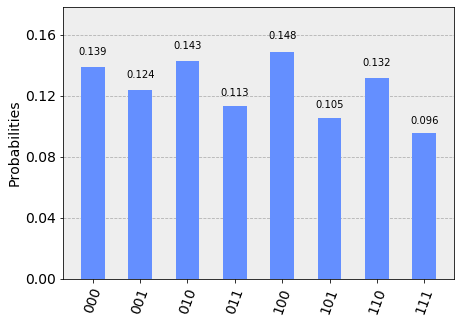

In [13]:
from qiskit.tools.monitor import job_monitor


IBMQ.get_provider(hub='ibm-q')
AccountProvider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
AccountProvider.backends()

#filters=lambda x: x.configuration().n_qubits <= 5 and not x.configuration().simulator and x.status().operational==True
#backend = least_busy(AccountProvider.backends(operational=True))
backend = AccountProvider.get_backend("ibmq_16_melbourne")
print("least busy backend: ", backend)


shots = 1024
job = execute(groverCircuit, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

results = job.result()
answer = results.get_counts(groverCircuit)
print(answer)
#print(results.time_taken)

plot_histogram(answer)



In [9]:
backend = AccountProvider.get_backend("ibmq_ourense")
print("least busy backend: ", backend)

NameError: name 'AccountProvider' is not defined

### BBHT - Grover 3 Qbits



In [424]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math 
import random

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Gate
from qiskit.providers.aer import QasmSimulator

def oraculo(qc, qr):
    
    """#100
    qc.x(qr[1])
    qc.x(qr[2])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[1])
    qc.x(qr[2])"""
    
    
    
    """#001
    qc.x(qr[0])
    qc.x(qr[1])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[0])
    qc.x(qr[1])
    """
    
    """#110
    qc.x(qr[0])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[0])
    
    
    
    
    #101
    qc.x(qr[1])

    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])

    qc.x(qr[1])"""
    
    
    

    #111
    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])
    

def nCZ(circuit, controls, target):
    if (len(controls) > 4):
        raise ValueError('not implemented')
    elif (len(controls) == 1):
        circuit.h(target)
        circuit.cx(controls[0], target)
        circuit.h(target)
    elif (len(controls) == 2):
        circuit.h(target)
        circuit.ccx(controls[0], controls[1], target)
        circuit.h(target)
    elif (len(controls) == 3):       
        circuit.h(target)
        circuit.cccx(controls[0], controls[1], controls[2], target)
        circuit.h(target)
                

def inversao(qc, qr, n):
    qc.h(qr)
    qc.x(qr)
    
    nCZ(qc, [qr[j] for j in range(n-1)], qr[n-1])
    
    qc.x(qr)
    qc.h(qr)
    
def groverIteracao(groverCircuit, qr, n):
    oraculo(groverCircuit, qr)
    inversao(groverCircuit, qr, n)


pi = math.pi
n = 3
N = 2**n
m = 1
lmb = 1.34
upperBound = math.floor((N)**(1/2))

qr = QuantumRegister(n, 'q')
cr = ClassicalRegister(n, 'c')

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

contador = 1


IBMQ.get_provider(hub='ibm-q')
AccountProvider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

#backend = BasicAer.get_backend('qasm_simulator')
backend = AccountProvider.get_backend("ibmq_ourense")
achou = 0

while (achou == 0):
    print("====== iteration : ", contador, "======")
    kLista = list(range(1, math.floor(m+1))) 
    print("list of k : ", kLista)
    kAleatorio = random.choice(kLista)
    print("number of Grover iterations : ", kAleatorio)
    
    for i in range(kAleatorio):
        groverIteracao(groverCircuit, qr, n)
    
    groverCircuit.measure(qr,cr) 
    result = execute(groverCircuit, backend, shots = 1,  optimization_level=3).result()
    counts = result.get_counts()
    
    for j in counts:
        if (j in ['111']):
            print(j, " - ok")
            achou = 1
        else:
            print(j, " - nope")
            m = (m*lmb)
            print(m)
    
    print(counts)
    contador = contador + 1
        

        
plot_histogram(counts)
    
print("time taken: ", result.time_taken)



====== iteracao :  1 ======
lista de k :  [1]
iteracoes de grover :  1
111  - ok
{'111': 1}
tempo gasto:  3.2235443592071533


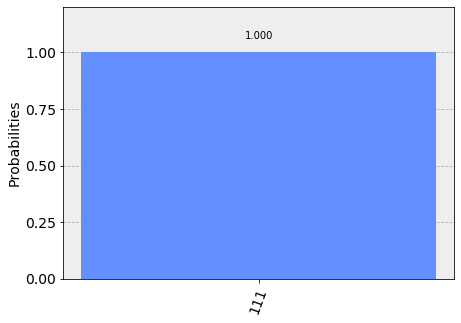

In [406]:
plot_histogram(counts)

### Grover 2 Qbits (t = 1, 2) 

1
{'00': 1968, '10': 2005, '01': 2088, '11': 2131}
0.0249330997467041


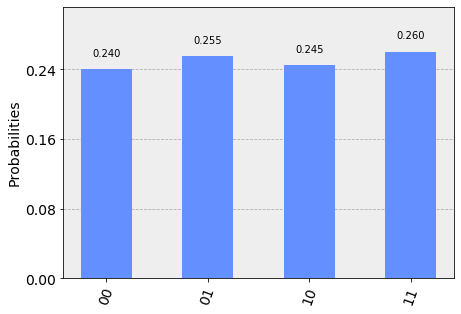

In [425]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import math as m
from qiskit.visualization import plot_histogram

def Oraculo(qc,q):
    
    """for i in range(2):
        qc.h(q[i])

    
    # s em todos qbits
    for i in range(2):
        qc.s(q[i])"""

    #qc.cx(q[0], q[1]) 
    
    qc.x(q[0])
    qc.x(q[1])
    qc.cz(q[0], q[1]) 
    
    #qc.cx(q[0], q[1]) 
    
    qc.x(q[0])
    qc.x(q[1])
    
    
    """for i in range(2):
        qc.s(q[i])"""
        
        
    
def Inversao(qc,q):
    for i in range(2):
        qc.h(q[i])
        
    for i in range(2):
        qc.x(q[i])

    qc.cz(q[0], q[1])

    for i in range(2):
        qc.x(q[i])

    for i in range(2):
        qc.h(q[i])


q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

N = 4
M = 2

iteracoes = m.floor(m.pi *(N/M)**(1/2) / 4 ) 
for i in range(iteracoes):#
    Oraculo(qc, q)
    qc.barrier(q)
    Inversao(qc,q)
    qc.barrier(q)
    print(iteracoes)

qc.measure(q, c)

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=8192).result()
counts = result.get_counts(qc)
print(counts)
print(result.time_taken)

plot_histogram(counts)

least busy backend:  ibmq_ourense
Job Status: job has successfully run
{'00': 37, '10': 24, '01': 483, '11': 480}
8.478020906448364


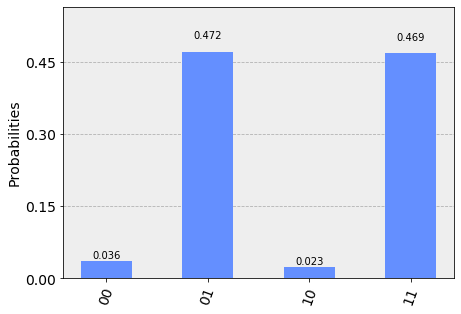

In [361]:
from qiskit.tools.monitor import job_monitor

AccountProvider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
AccountProvider.backends()

#filters=lambda x: x.configuration().n_qubits <= 5 and not x.configuration().simulator and x.status().operational==True
#backend = least_busy(AccountProvider.backends(operational=True))
backend = AccountProvider.get_backend("ibmq_ourense")
print("least busy backend: ", backend)

job = execute(qc, backend, shots = 1024, optimization_level=3)

job_monitor(job, interval = 2)

results = job.result()
answer = results.get_counts(qc)
print(answer)
print(results.time_taken)

plot_histogram(answer)


### References

Tight bounds on quantum searching
https://arxiv.org/abs/quant-ph/9605034

A quantum algorithm for finding the minimum
https://arxiv.org/pdf/quant-ph/9607014.pdf

Quantum Mechanics helps in searching for a needle in a haystack
https://arxiv.org/pdf/quant-ph/9706033.pdf